In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns


from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report,f1_score, confusion_matrix

from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [4]:
x_training_data = pd.read_csv('C:\\Users\\Masoumeh\\Human_Activity_Recognition\\train\\X_train.txt', sep=" ", header=None)
x_training_data 

,0,1,2,3,4,5,6,7,8,9
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469
...,...,...,...,...,...,...,...,...,...,...
1995,0.239866,-0.016819,-0.127938,-0.479384,-0.167162,-0.520564,-0.508147,-0.183497,-0.483609,-0.435364
1996,0.234524,-0.010957,-0.099738,-0.500860,-0.167850,-0.508214,-0.537495,-0.191106,-0.469048,-0.435364
1997,0.212202,-0.009611,-0.058073,-0.487049,-0.174565,-0.463627,-0.524110,-0.172802,-0.435630,-0.457439
1998,0.273924,0.016351,-0.082030,-0.480790,-0.088519,-0.466508,-0.506083,-0.113374,-0.438114,-0.457439


In [5]:
y_training_data = pd.read_csv('C:\\Users\\Masoumeh\\Human_Activity_Recognition\\train\\y_train.txt', sep=" ", header=None)

In [6]:
x_testing_data = pd.read_csv('C:\\Users\\Masoumeh\\Human_Activity_Recognition\\test\\X_test.txt', sep=" ", header=None)

In [7]:
y_testing_data = pd.read_csv('C:\\Users\\Masoumeh\\Human_Activity_Recognition\\test\\y_test.txt', sep=" ", header=None)

In [8]:
x_training_data.head()

,0,1,2,3,4,5,6,7,8,9
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469


In [9]:
x_training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2000 non-null   float64
 1   1       2000 non-null   float64
 2   2       2000 non-null   float64
 3   3       2000 non-null   float64
 4   4       2000 non-null   float64
 5   5       2000 non-null   float64
 6   6       2000 non-null   float64
 7   7       2000 non-null   float64
 8   8       2000 non-null   float64
 9   9       2000 non-null   float64
dtypes: float64(10)
memory usage: 156.4 KB


In [10]:
x_training_data.describe

<bound method NDFrame.describe of              0         1         2         3         4         5         6  \
0     0.288585 -0.020294 -0.132905 -0.995279 -0.983111 -0.913526 -0.995112   
1     0.278419 -0.016411 -0.123520 -0.998245 -0.975300 -0.960322 -0.998807   
2     0.279653 -0.019467 -0.113462 -0.995380 -0.967187 -0.978944 -0.996520   
3     0.279174 -0.026201 -0.123283 -0.996091 -0.983403 -0.990675 -0.997099   
4     0.276629 -0.016570 -0.115362 -0.998139 -0.980817 -0.990482 -0.998321   
...        ...       ...       ...       ...       ...       ...       ...   
1995  0.239866 -0.016819 -0.127938 -0.479384 -0.167162 -0.520564 -0.508147   
1996  0.234524 -0.010957 -0.099738 -0.500860 -0.167850 -0.508214 -0.537495   
1997  0.212202 -0.009611 -0.058073 -0.487049 -0.174565 -0.463627 -0.524110   
1998  0.273924  0.016351 -0.082030 -0.480790 -0.088519 -0.466508 -0.506083   
1999  0.359350 -0.023102 -0.075862 -0.440916 -0.083580 -0.465084 -0.478698   

             7         8     

In [11]:
x_training_data.corr

<bound method DataFrame.corr of              0         1         2         3         4         5         6  \
0     0.288585 -0.020294 -0.132905 -0.995279 -0.983111 -0.913526 -0.995112   
1     0.278419 -0.016411 -0.123520 -0.998245 -0.975300 -0.960322 -0.998807   
2     0.279653 -0.019467 -0.113462 -0.995380 -0.967187 -0.978944 -0.996520   
3     0.279174 -0.026201 -0.123283 -0.996091 -0.983403 -0.990675 -0.997099   
4     0.276629 -0.016570 -0.115362 -0.998139 -0.980817 -0.990482 -0.998321   
...        ...       ...       ...       ...       ...       ...       ...   
1995  0.239866 -0.016819 -0.127938 -0.479384 -0.167162 -0.520564 -0.508147   
1996  0.234524 -0.010957 -0.099738 -0.500860 -0.167850 -0.508214 -0.537495   
1997  0.212202 -0.009611 -0.058073 -0.487049 -0.174565 -0.463627 -0.524110   
1998  0.273924  0.016351 -0.082030 -0.480790 -0.088519 -0.466508 -0.506083   
1999  0.359350 -0.023102 -0.075862 -0.440916 -0.083580 -0.465084 -0.478698   

             7         8       

<AxesSubplot:>

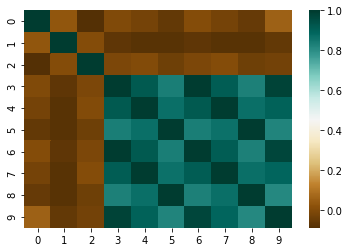

In [12]:
sns.heatmap(x_training_data.corr(),cmap="BrBG",annot=False)

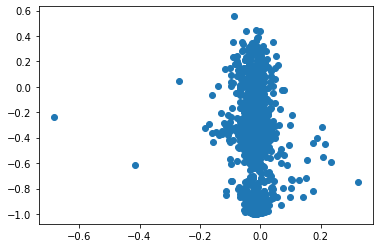

In [13]:
# s, c = np.random.rand(4, 30)
# s *= 10**2.

# fig, ax = plt.subplots()
plt.scatter(x_training_data.loc[:,1], x_training_data.loc[:,8])

plt.show()

In [14]:
svm_classifier = SVC(kernel='rbf')

In [15]:
pipe_steps = [('scaler', StandardScaler()), ('svc', svm_classifier)]
pipe = Pipeline(steps=pipe_steps)

In [16]:
search_hyper_params = {'svc__C': [0.01, 0.1, 1 , 8, 10 , 100, 1000], 'svc__gamma': [2, 1, 0.1, 0.01, 0.001,0.0005, 0.0001]}

In [27]:
from sklearn.model_selection import GridSearchCV

In [26]:
grid_search = GridSearchCV(pipe, search_hyper_params, cv=25, n_jobs=-1)

In [19]:
grid_search.fit(x_training_data, y_training_data)

C:\Users\Masoumeh\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GridSearchCV(cv=25,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svc', SVC())]),
             n_jobs=-1,
             param_grid={'svc__C': [0.01, 0.1, 1, 8, 10, 100, 1000],
                         'svc__gamma': [2, 1, 0.1, 0.01, 0.001, 0.0005,
                                        0.0001]})

In [20]:
grid_search.best_params_

{'svc__C': 100, 'svc__gamma': 0.1}

In [21]:
prediction = grid_search.predict(x_testing_data)

In [22]:
print(confusion_matrix(y_testing_data, prediction))

[[132  48   6   0   0   0]
 [ 68  73   8   0   0   0]
 [  4  12 118   0   0   0]
 [  0   0   0  69  70  31]
 [  0   0   0  30 119  29]
 [  0   0   0   7  22 154]]


In [23]:
print(classification_report(y_testing_data, prediction))

              precision    recall  f1-score   support

         1.0       0.65      0.71      0.68       186
         2.0       0.55      0.49      0.52       149
         3.0       0.89      0.88      0.89       134
         4.0       0.65      0.41      0.50       170
         5.0       0.56      0.67      0.61       178
         6.0       0.72      0.84      0.78       183

    accuracy                           0.67      1000
   macro avg       0.67      0.67      0.66      1000
weighted avg       0.66      0.67      0.66      1000



In [24]:
f1_score_SVC=print(f1_score(y_testing_data, prediction,average=None))

[0.67692308 0.5177305  0.88721805 0.5        0.61182519 0.77581864]


kernel poly

In [65]:
svm_classifier = SVC(kernel='poly')

In [66]:
pipe_steps = [('scaler', StandardScaler()), ('svc', svm_classifier)]
pipe = Pipeline(steps=pipe_steps)

In [67]:
search_hyper_params = {'svc__C': [0.01, 0.1, 1 , 8, 10 , 100, 1000], 'svc__gamma': [2, 1, 0.1, 0.01, 0.001,0.0005, 0.0001]}

In [68]:
from sklearn.model_selection import GridSearchCV

In [69]:
grid_search = GridSearchCV(pipe,search_hyper_params, cv=25, n_jobs=-1)

In [ ]:
grid_search.fit(x_training_data, y_training_data)

In [ ]:
prediction = grid_search.predict(x_testing_data)

In [ ]:
print(confusion_matrix(y_testing_data, prediction))

In [ ]:
print(classification_report(y_testing_data, prediction))

In [ ]:
f1_score_SVC=print(f1_score(y_testing_data, prediction,average=None))

kernel Linear

In [ ]:
svm_classifier = SVC(kernel='linear')

In [ ]:
pipe_steps = [('scaler', StandardScaler()), ('svc', svm_classifier)]
pipe = Pipeline(steps=pipe_steps)

In [ ]:
search_hyper_params = {'svc__C': [0.01, 0.1, 1 , 8, 10 , 100, 1000], 'svc__gamma': [2, 1, 0.1, 0.01, 0.001,0.0005, 0.0001]}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_search = GridSearchCV(pipe,search_hyper_params, cv=25, n_jobs=-1)

In [ ]:
prediction = grid_search.predict(x_testing_data)

In [ ]:
print(confusion_matrix(y_testing_data, prediction))

In [ ]:
print(classification_report(y_testing_data, prediction))

In [ ]:
f1_score_SVC=print(f1_score(y_testing_data, y_predict_lda,average=None))

# PCA

In [28]:
# scale data before pca
scaler = StandardScaler()
x_training_data = scaler.fit_transform(x_training_data)
x_testing_data = scaler.transform(x_testing_data)

In [29]:
data_pca = PCA(n_components=None)
pca_components = data_pca.fit(x_training_data)
x_training_data = pca_components.fit_transform(x_training_data)
x_testing_data = pca_components.transform(x_testing_data)

In [30]:
sum(pca_components.explained_variance_ratio_[:50])

1.0

In [31]:
svc_clf = SVC(kernel="linear")
svc_clf.fit(x_training_data, y_training_data)

C:\Users\Masoumeh\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(kernel='linear')

In [38]:
y_predict_lda = svc_clf.predict(x_testing_data)

In [39]:
print(classification_report(y_testing_data, y_predict))

              precision    recall  f1-score   support

         1.0       0.62      0.73      0.67       186
         2.0       0.55      0.44      0.49       149
         3.0       0.93      0.92      0.92       134
         4.0       0.82      0.05      0.10       170
         5.0       0.42      0.90      0.57       178
         6.0       0.79      0.60      0.68       183

    accuracy                           0.60      1000
   macro avg       0.69      0.61      0.57      1000
weighted avg       0.68      0.60      0.57      1000



In [56]:
f1_score_PCA=print(f1_score(y_testing_data, y_predict_lda,average="micro"))

0.618


# LDA

In [41]:
# scale data before Lda
scaler = StandardScaler()
x_training_data = scaler.fit_transform(x_training_data)
x_testing_data = scaler.transform(x_testing_data)

In [42]:
bc_lda = LDA()
x_training_lda = bc_lda.fit_transform(x_training_data, y_training_data)
x_testing_lda = bc_lda.transform(x_testing_data)

C:\Users\Masoumeh\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [43]:
bc_model_lda = SVC(kernel="rbf")
bc_model_lda.fit(x_training_lda, y_training_data)
y_predict_lda = bc_model_lda.predict(x_testing_lda)
print(classification_report(y_testing_data, y_predict_lda))

C:\Users\Masoumeh\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

         1.0       0.71      0.70      0.71       186
         2.0       0.57      0.54      0.56       149
         3.0       0.88      0.94      0.91       134
         4.0       0.71      0.06      0.11       170
         5.0       0.53      0.65      0.58       178
         6.0       0.52      0.84      0.64       183

    accuracy                           0.62      1000
   macro avg       0.65      0.62      0.58      1000
weighted avg       0.65      0.62      0.58      1000



In [54]:
f1_score_LDA=f1_score(y_testing_data, y_predict_lda,average="micro")

In [55]:
print(f1_score_LDA)

0.618


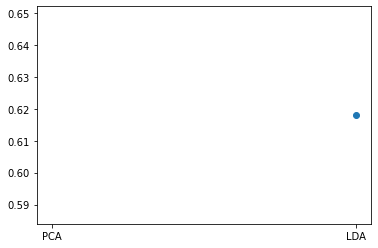

In [59]:
# x=["PCA","LDA"]
# y=[f1_score_PCA, f1_score_LDA]
# plt.scatter(x, y)
# plt.show()